In [4]:
%matplotlib inline
from pycalphad import Database, energy_surf, isotherm
from pycalphad.variables import *

db = Database('bigrose.tdb')
my_phases = ['TEST']
%time sys_df = energy_surf(db, ['H', 'HE', 'LI'] , my_phases, T=1773.0, pdens=10000)

CPU times: user 88 ms, sys: 21 ms, total: 109 ms
Wall time: 86.8 ms


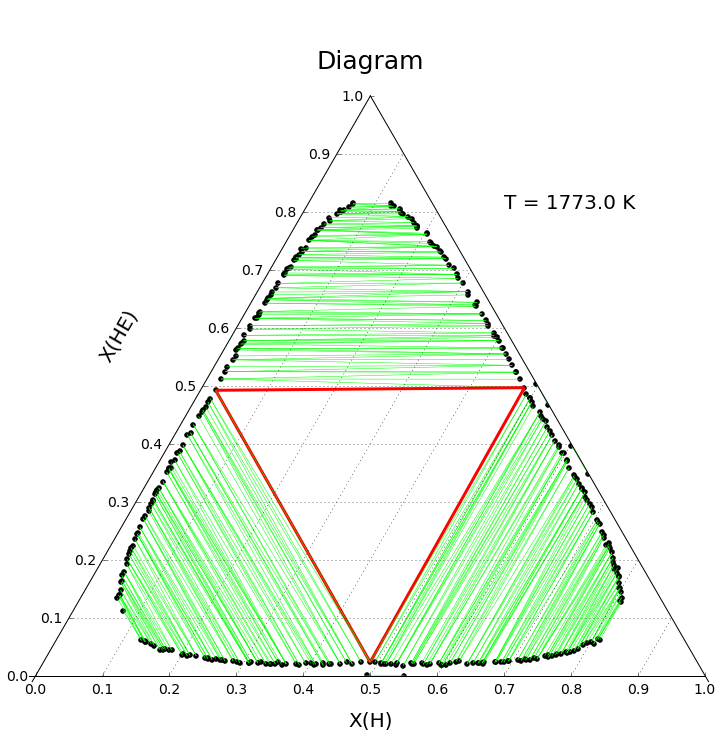

CPU times: user 3.14 s, sys: 956 ms, total: 4.1 s
Wall time: 2.94 s


In [5]:
%time isotherm(sys_df, 'X(H)','X(HE)', T=1773.0)

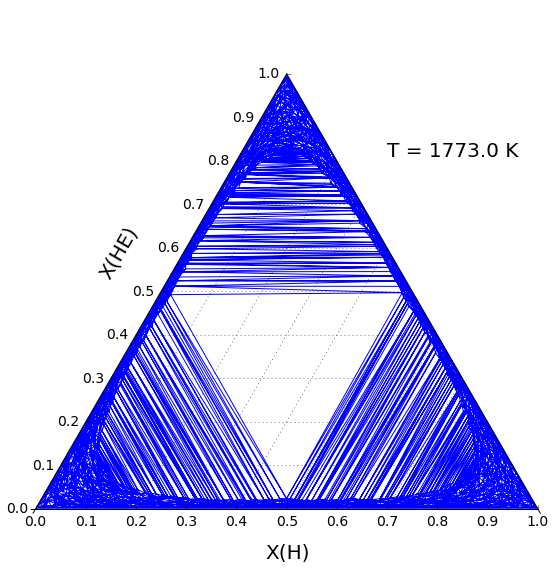

In [6]:
# Final plotting setup
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial
x_variable = 'X(H)'
y_variable = 'X(HE)'
hull = scipy.spatial.ConvexHull(
    sys_df[['X(H)', 'X(HE)', 'GM']].values
)
fig = plt.figure(dpi=600,figsize=(9,9))
ax = fig.gca(projection="triangular") # use ternary axes
ax.tick_params(axis='both', which='major', labelsize=14)
ax.grid(True)
plt.xlim([-0.01,1])
plt.ylim([-0.01,1])
plt.gca().set_aspect('equal')

ax.text(0.3, 0.8, 'T = '+str(sys_df['T'][0])+ ' K',
        verticalalignment='bottom', horizontalalignment='left',
        color='black', fontsize=20)

plt.triplot(hull.points[:,0], hull.points[:, 1], hull.simplices.copy())
ax.set_xlabel(x_variable, labelpad=15,fontsize=20)
ax.set_ylabel(y_variable,rotation=60,fontsize=20,labelpad=-120)
plt.show()